<a href="https://colab.research.google.com/github/56sarager/Data-Analysis-Colabs/blob/main/Neutron_Irraditaion_Copper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neutron Irradiation Copper

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools
#%matplotlib inline
path='/content/drive/MyDrive/PHYS3112/Neutron_Irradiation/'
Cudf1=pd.read_csv(path+'exp5_1.tsv', sep='\t', skiprows=10)
Cudf2=pd.read_csv(path+'background_2.tsv', sep='\t',skiprows=10)
Cudf3=pd.read_csv(path+'background_5.tsv', sep='\t',skiprows=10)
Cudf4=pd.read_csv(path+'exp5_2.tsv', sep='\t', skiprows=10)
Cudf5=pd.read_csv(path+'exp5_Cuf1.tsv', sep='\t', skiprows=10)
Cudf6=pd.read_csv(path+'background_2fexp5.tsv', sep='\t', skiprows=10)
sum=Cudf6.loc[:, 'Voltage']
sum=np.sum(sum)
correction = np.ceil((Cudf2.loc[:, 'Voltage']+Cudf3.loc[:, 'Voltage']+sum)/10)
Cucdf=[]
i=1
while i <= 3:
  j=Cudf1.loc[i, 'Voltage']-correction
  Cucdf.append(j)
  i+=1
Cucdf2=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in Cucdf:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        Cucdf2.append(p3)
del Cucdf2[1::2]
Cu2cdf=[]
Cucdf2 = np.array(Cucdf2, dtype=np.float32)
Cucdf3 = Cucdf2/1.01
i=1
while i <= 3:
  j=Cudf4.loc[i, 'Voltage']-correction
  Cu2cdf.append(j)
  i+=1
Cu2cdf2=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in Cu2cdf:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        Cu2cdf2.append(p3)
del Cu2cdf2[1::2]
Cu2cdf2 = np.array(Cu2cdf2, dtype=np.float32)
Cu2cdf3 = Cu2cdf2/1.03
Cu3cdf=[]
i=1
while i <= 6:
  j=Cudf5.loc[i, 'Voltage']-correction
  Cu3cdf.append(j)
  i+=1
Cu3cdf2=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in Cu3cdf:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        Cu3cdf2.append(p3)
del Cu3cdf2[1::2]
Cu3cdf2 = np.array(Cu3cdf2, dtype=np.float32)
Cu3cdf3 = Cu3cdf2/1.03
Cut=[300,600,900]
Cut = np.array(Cut, dtype=np.float32)
Cutf=[300,600,900,1200,1500,1800]
Cutf = np.array(Cutf, dtype=np.float32)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
Cux_data = Cut
Cux_data2 = Cutf
Cuy_data = np.copy(Cucdf3)
Cu2y_data = np.copy(Cu2cdf3)
Cu3y_data = np.copy(Cu3cdf3)

# Convert data to PyTorch tensors
Cux_tensor = torch.from_numpy(Cux_data).float().view(-1, 1)
Cux_tensor2 = torch.from_numpy(Cux_data2).float().view(-1, 1)
Cuy_tensor = torch.from_numpy(Cuy_data).float().view(-1, 1)
Cu2y_tensor = torch.from_numpy(Cu2y_data).float().view(-1, 1)
Cu3y_tensor = torch.from_numpy(Cu3y_data).float().view(-1, 1)
# Define the exponential decay model
#Cuinit = [357.44, 0.001]
Cuinit = [360, 0.0001]
Cua_init = Cuinit[0]
Cub_init = Cuinit[1]
class ExponentialDecayModel(nn.Module):
    def __init__(self):
        super(ExponentialDecayModel, self).__init__()
        self.a = nn.Parameter(torch.tensor(Cua_init, dtype=torch.float32, requires_grad=True))
        self.b = nn.Parameter(torch.tensor(Cub_init, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        return self.a * torch.exp(-self.b * x)

def loss_function(y_pred, y_true):
    x = (y_pred - y_true)**2
    return torch.mean(x)

# Instantiate the model and define the loss function and optimizer
model = ExponentialDecayModel()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    Cuy_pred = model(Cux_tensor)
    # Compute the loss
    loss = loss_function(Cuy_pred, Cuy_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    #if (epoch + 1) % 100 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Extract the fitted parameters
Cua_fit = model.a.item()
Cub_fit = model.b.item()

#Cuinit = [311.67, 0.0008]
Cuinit = [310, 0.0001]
Cua_init = Cuinit[0]
Cub_init = Cuinit[1]

model = ExponentialDecayModel()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    Cuy_pred = model(Cux_tensor)
    # Compute the loss
    loss = loss_function(Cuy_pred, Cuy_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Cu2a_fit = model.a.item()
Cu2b_fit = model.b.item()
###########
Cuinit = [185, 0.0001]
Cua_init = Cuinit[0]
Cub_init = Cuinit[1]

model = ExponentialDecayModel()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    Cuy_pred = model(Cux_tensor2)
    # Compute the loss
    loss = loss_function(Cuy_pred, Cu3y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Cu3a_fit = model.a.item()
Cu3b_fit = model.b.item()

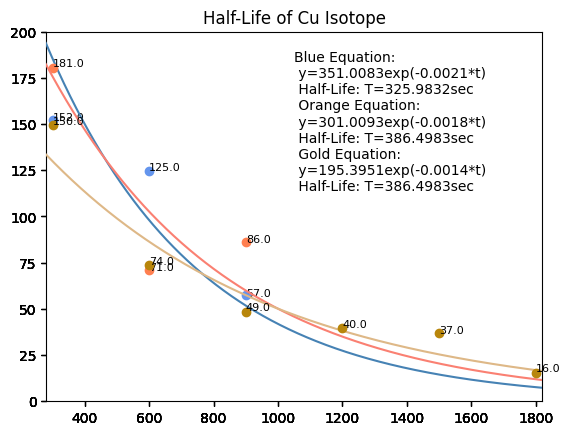

Count Uncertainties +/- for Points Left to Right Alternating Cyan and Orange: [0.08111071 0.07432941 0.08944272 0.11867817 0.13245324 0.10783277]
Gold Count Uncertainties +/- for Points Left to Right: [0.08164966 0.11624764 0.14285714 0.15811388 0.16439899 0.25      ]


In [ ]:
Cut2=np.linspace(0,2120,2120)
Cuy_fit = Cua_fit * np.exp(-Cub_fit * Cut2)
Cu2y_fit = Cu2a_fit * np.exp(-Cu2b_fit * Cut2)
Cu3y_fit = Cu3a_fit * np.exp(-Cu3b_fit * Cut2)

fig=plt.figure()
ax=fig.add_subplot(111, label="51")
ax2=fig.add_subplot(111, label="52", frame_on=False)
ax3=fig.add_subplot(111, label="53", frame_on=False)
ax4=fig.add_subplot(111, label="54", frame_on=False)
ax5=fig.add_subplot(111, label="55", frame_on=False)
ax6=fig.add_subplot(111, label="56", frame_on=False)
Cucdf3 = np.round(Cucdf3)
[ax.text(i, j, f'{j}', fontsize=8, ha='left') for (i, j) in zip(Cut, Cucdf3)]
plt.title("Half-Life of Cu Isotope")
Culs = np.linspace(0,900,4)
Culs = np.array(Culs).tolist()
del Culs[0]
Culs = np.array(Culs)
ax.scatter(Cux_data, Cuy_data, color="cornflowerblue")
Cua_fitw=str(round(Cua_fit,4))
CuT=np.log(2)/Cub_fit
Cub_fitw=str(round(Cub_fit,4))
CuTw=str(round(CuT,4))
Cu2a_fitw=str(round(Cu2a_fit,4))
Cu2T=np.log(2)/Cu2b_fit
Cu2b_fitw=str(round(Cu2b_fit,4))
Cu2Tw=str(round(Cu2T,4))
Cu3a_fitw=str(round(Cu3a_fit,4))
Cu3T=np.log(2)/Cu3b_fit
Cu3b_fitw=str(round(Cu3b_fit,4))
Cu3Tw=str(round(Cu2T,4))
ax.text(0.5, 0.95, 'Blue Equation:\n y='+Cua_fitw+'exp(-'+Cub_fitw+'*t)\n Half-Life: T='+CuTw+'sec\n Orange Equation:\n y='+Cu2a_fitw+
        'exp(-'+Cu2b_fitw+'*t)\n Half-Life: T='+Cu2Tw+'sec\n Gold Equation:\n y='+Cu3a_fitw+
        'exp(-'+Cu3b_fitw+'*t)\n Half-Life: T='+Cu3Tw+'sec', horizontalalignment='left', verticalalignment='top', transform=ax.transAxes)
ax2.plot(Cut2, Cuy_fit, color="steelblue")
Cu2cdf3 = np.round(Cu2cdf3)
[ax3.text(i, j, f'{j}', fontsize=8, ha='left') for (i, j) in zip(Cut, Cu2cdf3)]
ax3.scatter(Cut, Cu2y_data, color="coral")
ax6.scatter(Cutf, Cu3y_data, color="darkgoldenrod")
b=np.round(Cu3cdf3)
[ax6.text(i, j, f'{j}', fontsize=8, ha='left') for (i, j) in zip(Cutf, b)]
ax4.plot(Cut2, Cu2y_fit, color="salmon")
ax5.plot(Cut2, Cu3y_fit, color="burlywood")
ax.set_ylim([0, 200])
ax.set_xlim([280, 1820])
ax2.set_ylim([0, 200])
ax2.set_xlim([280, 1820])
ax3.set_ylim([0, 200])
ax3.set_xlim([280, 1820])
ax4.set_ylim([0, 200])
ax4.set_xlim([280, 1820])
ax5.set_ylim([0, 200])
ax5.set_xlim([280, 1820])
ax6.set_ylim([0, 200])
ax6.set_xlim([280, 1820])
plt.show()
yerr=1/np.sqrt([152, 181, 125, 71, 57, 86])
print('Count Uncertainties +/- for Points Left to Right Alternating Cyan and Orange:',yerr)
tyerr=1/np.sqrt([150, 74, 49, 40, 37, 16])
print('Gold Count Uncertainties +/- for Points Left to Right:',tyerr)
fig.savefig('Half-Life of Copper Isotope.png')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools
#%matplotlib inline
path='/content/drive/MyDrive/PHYS3112/Neutron_Irradiation/'
a=pd.read_csv(path+'exp5_Cuf2.tsv', sep='\t', skiprows=10)
b=pd.read_csv(path+'background_3a.tsv', sep='\t',skiprows=10)
c=pd.read_csv(path+'background_3b.tsv', sep='\t',skiprows=10)
d=pd.read_csv(path+'background_3c.tsv', sep='\t',skiprows=10)
e=pd.read_csv(path+'background_agf1.tsv', sep='\t',skiprows=10)
f=pd.read_csv(path+'background_agf2.tsv', sep='\t',skiprows=10)
cu1=b.loc[:, 'Voltage']
cu1=np.sum(cu1)
cu2=c.loc[:, 'Voltage']
cu2=np.sum(cu2)
cu3=d.loc[:, 'Voltage']
cu3=np.sum(cu3)
cu4=e.loc[:, 'Voltage']
cu4=np.sum(cu4)
cu5=f.loc[:, 'Voltage']
cu5=np.sum(cu5)
correction = np.ceil((cu1+cu2+cu3+cu4+cu5)/120)
Cucdf=[]
i=1
while i <= 15:
  j=a.loc[i, 'Voltage']-correction
  Cucdf.append(j)
  i+=1
Cus=np.array(Cucdf).tolist()
Cust = [30,60,90,120,150,180,210,240,270,300,330,360,390,420,450]
Cust=np.array(Cust).tolist()
Cus = np.array(Cus, dtype=np.float32)
Cust = np.array(Cust, dtype=np.float32)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
x_data3 = Cust
y_data3 = Cus

# Convert data to PyTorch tensors
x_tensor3 = torch.from_numpy(x_data3).float().view(-1, 1)
y_tensor3 = torch.from_numpy(y_data3).float().view(-1, 1)
# Define the exponential decay model
init3 = [15, 0.0001]
a_init3 = init3[0]
b_init3 = init3[1]
class ExponentialDecayModel(nn.Module):
    def __init__(self):
        super(ExponentialDecayModel, self).__init__()
        self.a = nn.Parameter(torch.tensor(a_init3, dtype=torch.float32, requires_grad=True))
        self.b = nn.Parameter(torch.tensor(b_init3, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        return self.a * torch.exp(-self.b * x)

def loss_function(y_pred, y_true):
    x = (y_pred - y_true)**2
    return torch.mean(x)

# Instantiate the model and define the loss function and optimizer
model = ExponentialDecayModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    y_pred3 = model(x_tensor3)
    # Compute the loss
    loss = loss_function(y_pred3, y_tensor3)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    #if (epoch + 1) % 100 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Extract the fitted parameters
a_fit3 = model.a.item()
b_fit3 = model.b.item()
# Generate the fitted curve
t23=np.linspace(0,500,500)
y_fit3 = a_fit3 * np.exp(-b_fit3 * t23)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
x_data31 = [30,90,210,330]
x_data31 = np.array(x_data31)
y_data31 = [13,12,10,7]
y_data31 = np.array(y_data31)

# Convert data to PyTorch tensors
x_tensor31 = torch.from_numpy(x_data31).float().view(-1, 1)
y_tensor31 = torch.from_numpy(y_data31).float().view(-1, 1)
# Define the exponential decay model
init31 = [15, 0.0001]
a_init31 = init31[0]
b_init31 = init31[1]
class ExponentialDecayModel(nn.Module):
    def __init__(self):
        super(ExponentialDecayModel, self).__init__()
        self.a = nn.Parameter(torch.tensor(a_init31, dtype=torch.float32, requires_grad=True))
        self.b = nn.Parameter(torch.tensor(b_init31, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        return self.a * torch.exp(-self.b * x)

def loss_function(y_pred, y_true):
    x = (y_pred - y_true)**2
    return torch.mean(x)

# Instantiate the model and define the loss function and optimizer
model = ExponentialDecayModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    y_pred31 = model(x_tensor31)
    # Compute the loss
    loss = loss_function(y_pred31, y_tensor31)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    #if (epoch + 1) % 100 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Extract the fitted parameters
a_fit31 = model.a.item()
b_fit31 = model.b.item()
# Generate the fitted curve
t23=np.linspace(0,500,500)
y_fit31 = a_fit31 * np.exp(-b_fit31 * t23)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
x_data32 = [180,270,360,450]
y_data32 = [24,16,10,7]
x_data32=np.array(x_data32)
y_data32=np.array(y_data32)

# Convert data to PyTorch tensors
x_tensor32 = torch.from_numpy(x_data32).float().view(-1, 1)
y_tensor32 = torch.from_numpy(y_data32).float().view(-1, 1)
# Define the exponential decay model
init32 = [55, 0.0001]
a_init32 = init32[0]
b_init32 = init32[1]
class ExponentialDecayModel(nn.Module):
    def __init__(self):
        super(ExponentialDecayModel, self).__init__()
        self.a = nn.Parameter(torch.tensor(a_init32, dtype=torch.float32, requires_grad=True))
        self.b = nn.Parameter(torch.tensor(b_init32, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        return self.a * torch.exp(-self.b * x)

def loss_function(y_pred, y_true):
    x = (y_pred - y_true)**2
    return torch.mean(x)

# Instantiate the model and define the loss function and optimizer
model = ExponentialDecayModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    y_pred32 = model(x_tensor32)
    # Compute the loss
    loss = loss_function(y_pred32, y_tensor32)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    #if (epoch + 1) % 100 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Extract the fitted parameters
a_fit32 = model.a.item()
b_fit32 = model.b.item()
# Generate the fitted curve
t23=np.linspace(0,500,500)
y_fit32 = a_fit32 * np.exp(-b_fit32 * t23)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
x_data33 = [120,150,210,300]
y_data33 = [18,15,10,6]
x_data33=np.array(x_data33)
y_data33=np.array(y_data33)

# Convert data to PyTorch tensors
x_tensor33 = torch.from_numpy(x_data33).float().view(-1, 1)
y_tensor33 = torch.from_numpy(y_data33).float().view(-1, 1)
# Define the exponential decay model
init33 = [35, 0.0001]
a_init33 = init33[0]
b_init33 = init33[1]
class ExponentialDecayModel(nn.Module):
    def __init__(self):
        super(ExponentialDecayModel, self).__init__()
        self.a = nn.Parameter(torch.tensor(a_init33, dtype=torch.float32, requires_grad=True))
        self.b = nn.Parameter(torch.tensor(b_init33, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        return self.a * torch.exp(-self.b * x)

def loss_function(y_pred, y_true):
    x = (y_pred - y_true)**2
    return torch.mean(x)

# Instantiate the model and define the loss function and optimizer
model = ExponentialDecayModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    y_pred33 = model(x_tensor33)
    # Compute the loss
    loss = loss_function(y_pred33, y_tensor33)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    #if (epoch + 1) % 100 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Extract the fitted parameters
a_fit33 = model.a.item()
b_fit33 = model.b.item()
# Generate the fitted curve
t23=np.linspace(0,500,500)
y_fit33 = a_fit33 * np.exp(-b_fit33 * t23)

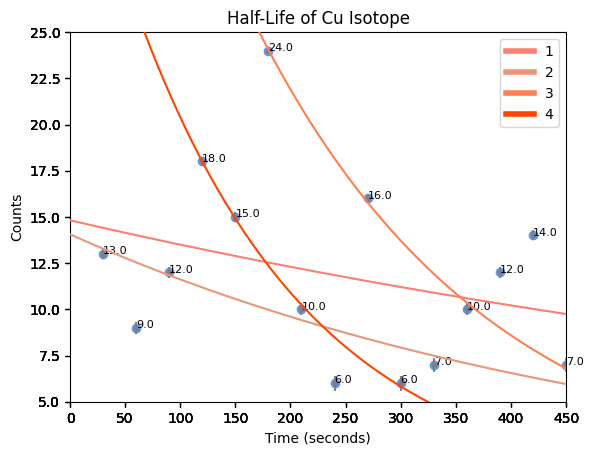

Count Uncertainties +/- for Points Left to Right: [0.2773501  0.33333334 0.28867513 0.23570228 0.2581989  0.20412414
 0.31622776 0.40824828 0.25       0.40824828 0.3779645  0.31622776
 0.28867513 0.26726124 0.3779645 ]
Equation 1 (All Data Points): y=14.8152exp(-0.0009*t)
 Half-Life: T=745.0791sec
Equation 2: y=14.061exp(-0.0019*t)
 Half-Life: T=363.1432sec
Equation 3: y=55.7999exp(-0.0047*t)
 Half-Life: T=148.1979sec
Equation 4: y=38.1565exp(-0.0063*t)
 Half-Life: T=110.6589sec


In [ ]:
from matplotlib.lines import Line2D
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax3=fig.add_subplot(111, label="3", frame_on=False)
ax4=fig.add_subplot(111, label="4", frame_on=False)
ax5=fig.add_subplot(111, label="5", frame_on=False)
plt.title("Half-Life of Cu Isotope")
ax.scatter(Cust, Cus, color="cornflowerblue")
[ax.text(i, j, f'{j}', fontsize=8, ha='left') for (i, j) in zip(Cust, Cus)]
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Counts")
sa_fit=str(round(a_fit3,4))
T=np.log(2)/b_fit3
sb_fit=str(round(b_fit3,4))
T=str(round(T,4))
sa_fit1=str(round(a_fit31,4))
T1=np.log(2)/b_fit31
sb_fit1=str(round(b_fit31,4))
T1=str(round(T1,4))
sa_fit2=str(round(a_fit32,4))
T2=np.log(2)/b_fit32
sb_fit2=str(round(b_fit32,4))
T2=str(round(T2,4))
sa_fit3=str(round(a_fit33,4))
T3=np.log(2)/b_fit33
sb_fit3=str(round(b_fit33,4))
T3=str(round(T3,4))
#ax.text(0.95, 0.95, 'Equation:\n y='+sa_fit+'exp(-'+sb_fit+'*t)\n Half-Life: T='+T+'sec', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)
yerrc2=1/np.sqrt(Cus)
ax.errorbar(Cust, Cus, xerr=0, yerr=yerrc2, fmt='.', color='gray')
ax2.plot(t23, y_fit3, color="salmon")
ax3.plot(t23, y_fit31, color="darksalmon")
ax4.plot(t23, y_fit32, color="coral")
ax5.plot(t23, y_fit33, color="orangered")
ax.set_xlim([0,450])
ax.set_ylim([5,25])
ax2.set_xlim([0,450])
ax2.set_ylim([5,25])
ax3.set_xlim([0,450])
ax3.set_ylim([5,25])
ax4.set_xlim([0,450])
ax4.set_ylim([5,25])
ax5.set_xlim([0,450])
ax5.set_ylim([5,25])
custom_lines = [Line2D([0], [0], color='salmon', lw=4),
                Line2D([0], [0], color='darksalmon', lw=4),
                Line2D([0], [0], color='coral', lw=4),
                Line2D([0], [0], color='orangered', lw=4)]
ax.legend(custom_lines, ['1', '2', '3', '4'])
plt.show()
fig.savefig('Half-Life of Cu Isotope 2.png')
print('Count Uncertainties +/- for Points Left to Right:',yerrc2)
print('Equation 1 (All Data Points): y='+sa_fit+'exp(-'+sb_fit+'*t)\n Half-Life: T='+T+'sec\n'+
      'Equation 2: y='+sa_fit1+'exp(-'+sb_fit1+'*t)\n Half-Life: T='+T1+'sec\n'+
      'Equation 3: y='+sa_fit2+'exp(-'+sb_fit2+'*t)\n Half-Life: T='+T2+'sec\n'+
      'Equation 4: y='+sa_fit3+'exp(-'+sb_fit3+'*t)\n Half-Life: T='+T3+'sec')